# **Bellabeat Fitbit Tracker**

### This case study was done using R

### Introduction: 
Bellabeat, a health-focused products company that aims toward women, Urska Srsen the co-founder and Chief Creative Officer of Bellabeat wants to analyze the smart device fitness data to help create new growth opportunities for the company. 

### Questions:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### Business Task: 

Identify possible opportunities for growth and recommendations for Bellabeat to improve its marketing strategy based on current trends in smart device usage. 

### Import Packages: 

In [1]:
library(tidyverse)
library(tidyr)
library(lubridate)
library(dplyr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Data:

The dataset is from Kaggle where it takes multiple points of data collected about the user. This includes daily calories, minutes sleeping, hourly calories, etc. This data will be the basis in helping Bellabeat create and useful business decisions invovling the fitbit. 

Direct link to orginal code: 
https://www.kaggle.com/datasets/arashnic/fitbit/code

### Importing Data:

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
intense <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")


In [3]:
#checking data
head(calories)

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


In [4]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [5]:
head(intensities)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


In [6]:
head(steps)

,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


In [7]:
head(heartrate)

,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


In [8]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [9]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [10]:
head(intense)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


After looking at each piece of the data represented here. The date and time needs to be formatted correctly. So I will clean data next. 

### Cleaning Data/Formatting

In [11]:
#activity
activity$ActivityDate= as.POSIXct(activity$ActivityDate, format = "%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%Y")

#calories
calories$ActivityDay= as.POSIXct(calories$ActivityDay, format = "%m/%d/%Y", tz=Sys.timezone())
calories$date <- format(calories$ActivityDay, format = "%m/%d/%Y")

#intense (hourly)
intense$ActivityHour= as.POSIXct(intense$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intense$date <- format(intense$ActivityHour, format = "%m/%d/%Y")
intense$time <- format(intense$ActivityHour, format = "%H:%M:%S")

#steps
steps$ActivityDay= as.POSIXct(steps$ActivityDay, format = "%m/%d/%Y", tz=Sys.timezone())
steps$date <- format(steps$ActivityDay, format = "%m/%d/%Y")

#heartrate
heartrate$Time= as.POSIXct(heartrate$Time, format = "%m/%d/%Y %H:%M:%S", tz=Sys.timezone())
heartrate$date <- format(heartrate$Time, format = "%m/%d/%Y %H:%M:%S")

#sleep
sleep$SleepDay= as.POSIXct(sleep$SleepDay, format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%Y")

#weight
weight$Date= as.POSIXct(weight$Date, format = "%m/%d/%Y %H:%M:%S", tz=Sys.timezone())
weight$date <- format(weight$Date, format = "%m/%d/%Y %H:%M:%S")


In [12]:
#Determine how many participants are in each of the datasets 

n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intense$Id)
n_distinct(steps$Id)
n_distinct(heartrate$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 14

[1] 24

[1] 8

Due to the low participation in heartrate and weight it will not give an accurate representation to create recommendations.  

In [13]:
#I will exclude heartrate and weight and will continue with the other categories
#I will summarize the data next

#activity per day
activity %>% select(TotalSteps, TotalDistance) %>% 
summary()

#compare different types of active levels per day
activity %>% select(VeryActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>% 
summary()

#calories per day
calories %>% select(Calories) %>% 
summary()

#intense 
intense %>% select(TotalIntensity, AverageIntensity) %>%
summary()

#steps
steps %>% select(StepTotal) %>%
summary()

#sleep
sleep %>% select(TotalMinutesAsleep, TotalTimeInBed) %>%
summary()

#intense
intense %>% select(ActivityHour, TotalIntensity) %>%
summary()




   TotalSteps    TotalDistance   
 Min.   :    0   Min.   : 0.000  
 1st Qu.: 3790   1st Qu.: 2.620  
 Median : 7406   Median : 5.245  
 Mean   : 7638   Mean   : 5.490  
 3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :36019   Max.   :28.030  

 VeryActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :518.0        Max.   :1440.0  

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

 TotalIntensity   AverageIntensity
 Min.   :  0.00   Min.   :0.0000  
 1st Qu.:  0.00   1st Qu.:0.0000  
 Median :  3.00   Median :0.0500  
 Mean   : 12.04   Mean   :0.2006  
 3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :180.00   Max.   :3.0000  

   StepTotal    
 Min.   :    0  
 1st Qu.: 3790  
 Median : 7406  
 Mean   : 7638  
 3rd Qu.:10727  
 Max.   :36019  

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

  ActivityHour                 TotalIntensity  
 Min.   :2016-04-12 00:00:00   Min.   :  0.00  
 1st Qu.:2016-04-19 01:00:00   1st Qu.:  0.00  
 Median :2016-04-26 06:00:00   Median :  3.00  
 Mean   :2016-04-26 11:46:42   Mean   : 12.04  
 3rd Qu.:2016-05-03 19:00:00   3rd Qu.: 16.00  
 Max.   :2016-05-12 15:00:00   Max.   :180.00  

There are a couple things to note in these summaries:
1. The average sleep time is about 7 hours, which is great
2. The average time in bed is 7.64 hours, meaning after a participant is awake it takes them 38 minutes to get up or 38 minutes before they fall asleep. 
3. There is an outlier of a participant who is laying in bed (not asleep the whole time) for 16 hours. 
4. Most participants walk their furthest during "Light Activity" 
5. The average calories burned per day is 2304
6. When looking at minutes of different levels of activity, the average amount of minutes consumed during "sendentary" level is 16.5 hours per day.


After looking at the data prepared I realized that to get all information into one dataset I will need to merge the datasets of activity and sleep together. 

In [14]:
total <- merge(activity,sleep,by=c("Id", "date"))
head(total)

,Id,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dttm>,<int>,<int>,<int>
1,1503960366,04/12/2016,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,1,327,346
2,1503960366,04/13/2016,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,2,384,407
3,1503960366,04/15/2016,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,1,412,442
4,1503960366,04/16/2016,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,2,340,367
5,1503960366,04/17/2016,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,1,700,712
6,1503960366,04/19/2016,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,2016-04-19,1,304,320


I now want to drop ActivityDate and SleepDay since we have now combine the two tables using "date"

In [15]:
total = subset(total, select = -c(ActivityDate,SleepDay) )
head(total)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,04/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,04/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,04/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,04/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,04/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


### Visulizations 

Now that I have remove duplicate data, cleaned and formatted it is now time to visualize the data. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



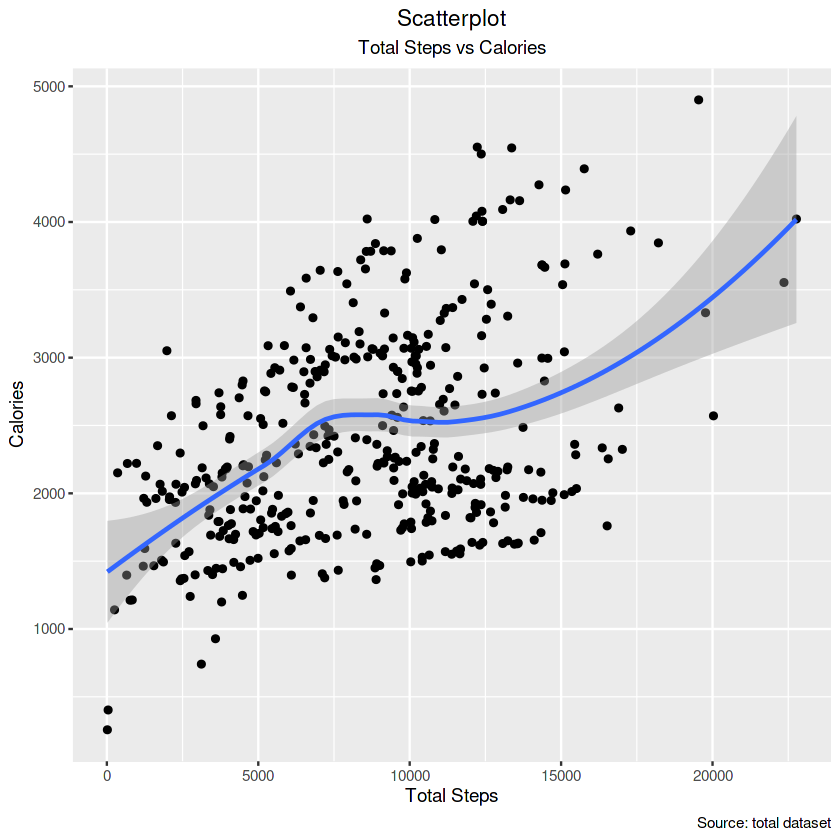

In [16]:
#scatterplot of data to find correlation 

gg <- ggplot(total, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + theme(plot.title = element_text(hjust = 0.5)) + theme(plot.subtitle = element_text(hjust = 0.5)) +
  labs(subtitle="Total Steps vs Calories", 
       y="Calories", 
       x="Total Steps", 
       title="Scatterplot", 
       caption = "Source: total dataset") 

plot(gg)

There looks to be a postive correlation between the total steps to calories loss. In this we would conclude that **the more steps taken the higher the calorie count is**. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



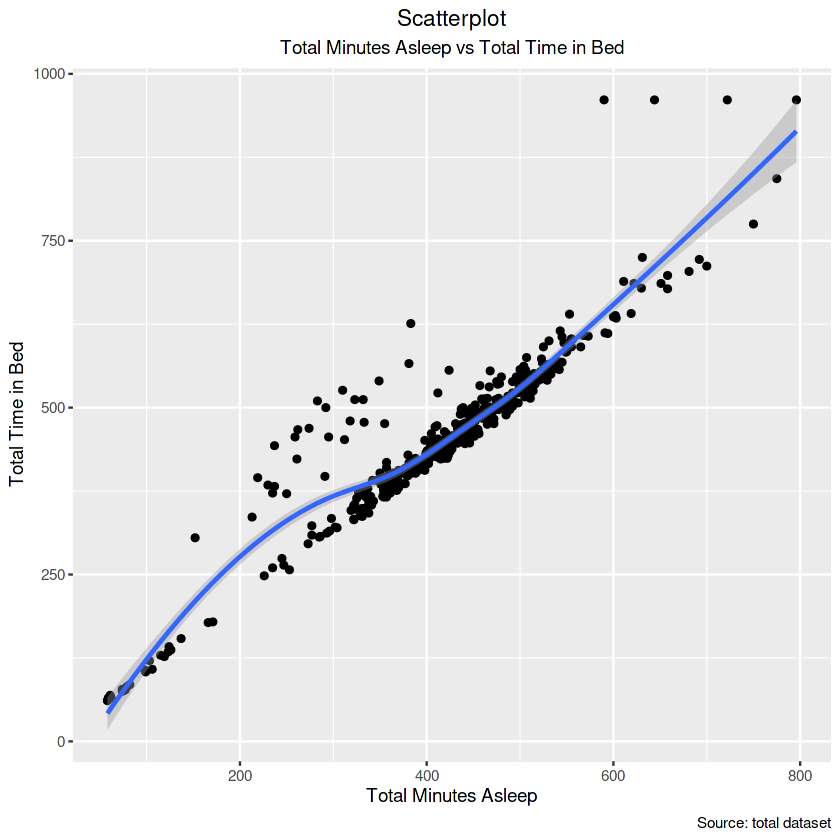

In [17]:
#scatterplot of data to find correlation 

gg <- ggplot(total, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point() + geom_smooth() + theme(plot.title = element_text(hjust = 0.5)) + theme(plot.subtitle = element_text(hjust = 0.5)) +
  labs(subtitle="Total Minutes Asleep vs Total Time in Bed", 
       y="Total Time in Bed", 
       x="Total Minutes Asleep", 
       title="Scatterplot", 
       caption = "Source: total dataset") 

plot(gg)

This scatterplot has a positive correlation. Meaning that the increase in total mintues asleep also increases the amount of time in bed. Showing that in order to get more rest at night or improve your hours of sleeping you **should set up a time to get into bed**.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



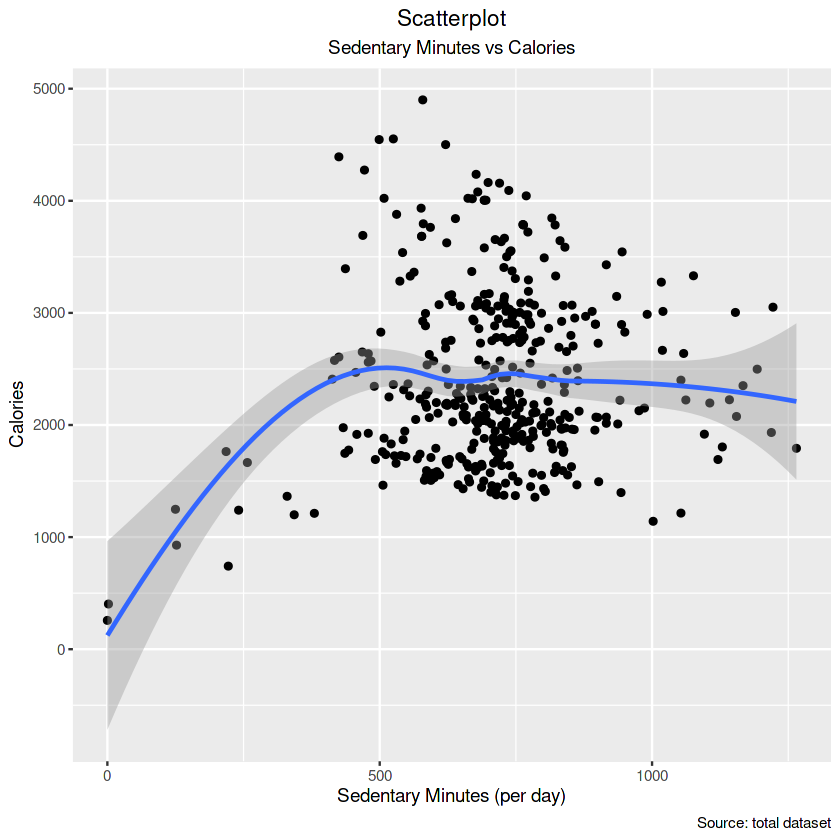

In [18]:
#scatterplot of data to find correlation 

gg <- ggplot(total, aes(x=SedentaryMinutes, y=Calories)) + 
  geom_point() + geom_smooth() + theme(plot.title = element_text(hjust = 0.5)) + theme(plot.subtitle = element_text(hjust = 0.5)) +
  labs(subtitle="Sedentary Minutes vs Calories", 
       y="Calories", 
       x="Sedentary Minutes (per day)", 
       title="Scatterplot", 
       caption = "Source: total dataset") 

plot(gg)

Calories vs Sedentary minutes do not show a correlation and will not be used for analysis. I will instead try the same thing with sedentary minutes and total minutes asleep. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



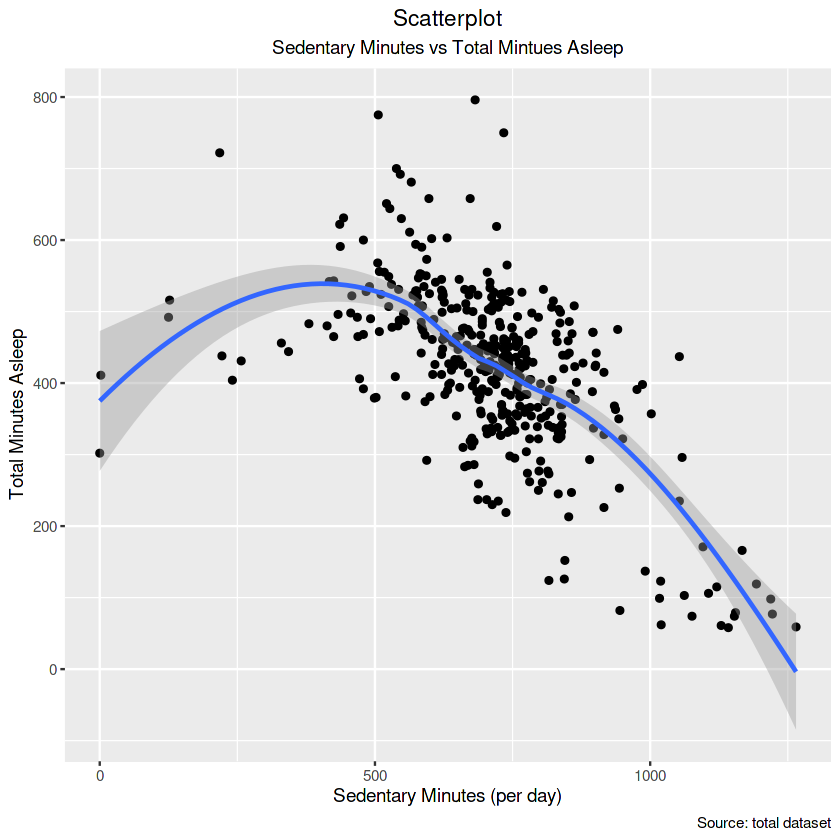

In [19]:
#scatterplot of data to find correlation 

gg <- ggplot(total, aes(x=SedentaryMinutes, y=TotalMinutesAsleep)) + 
  geom_point() + geom_smooth() + theme(plot.title = element_text(hjust = 0.5)) + theme(plot.subtitle = element_text(hjust = 0.5)) +
  labs(subtitle="Sedentary Minutes vs Total Mintues Asleep", 
       y="Total Minutes Asleep", 
       x="Sedentary Minutes (per day)", 
       title="Scatterplot", 
       caption = "Source: total dataset") 

plot(gg)

This shows a negative correlation. Meaning with increased sedentary minutes throughout the day decreased the total minutes of sleep per day. **Having a reminder to get up and be active throughout the day can potentially help improve your sleep**. 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


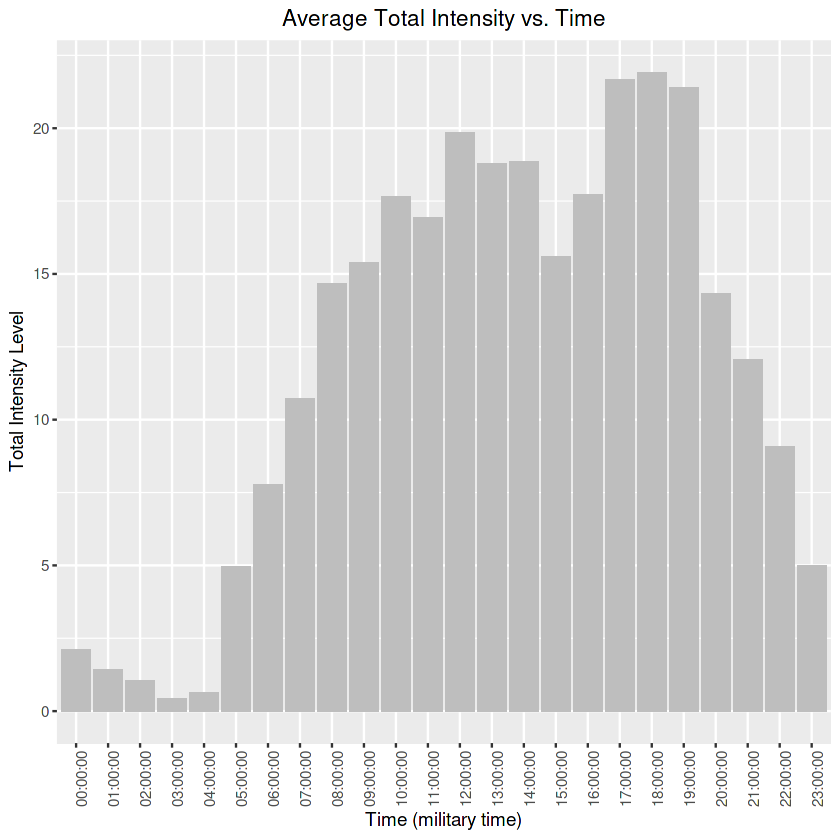

In [20]:
bp <- intense %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_bp = mean(TotalIntensity))

ggplot(data=bp, aes(x=time, y=mean_bp)) + geom_histogram(stat = "identity", fill='gray') + theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time", y="Total Intensity Level", 
       x="Time (military time)")


The bar graph allowed participants to see that the highest peak of intensity level sits between 5pm to 7 pm with a dip at 3pm. **This can help the participant to know when to increase levels**. Whether that be to go for a walk or move around to maintain the intensity level throughout the day. 

### Conclusion: 

Bellabeat has become a global manufacturing company focused on women-centered health products to track stress, sleep, menstrual cycle, and more. After cleaning, formatting, and analyzing the data from the smart device, I have a few recommendations that can help improve Bellabeat's marketing strategy.

As a company (Bellabeat) we want to help women improve their lifestyles and assist them in creating healthier and happier lifestyles. With a smart device, it can track different components of the client's lifestyle and then interpret it to give recommendations such as: setting a bedtime or increasing steps taken incrementally throughout the day. 

As a woman myself, I want the option of creating a lifestyle plan that both fits my needs and helps me out. The Bellabeat smart device could feed into the app and alert the client of potentially harmful habits (ie. increase sedentary minutes, decrease the amount of sleep per night) and create suggestions in guiding you to the right path. 

### Recommendations (for the app): 

1. Create a bedtime alert to help clients with healthy sleeping habits
2. Alert clients who have been sedentary for a certain time to get up and walk or move 
3. Since the most active hours is between 5-7 pm. Create a friendly reminder to workout or move around that timeframe
4. Have the client set a goal of total steps or distance to increase calories burned and decrease sedentary minutes per day
5. Extra: Create daily competitions of steps to achieve (if a client wants/needs motivation)